# Aula 7 - Exercícios - Storytelling e Correlação
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib

### 7.7 Plote o heatmap da correlação das variáveis do dataframe formado pelo merge do dataset do IDEB com o dataset de gini.
#### Plote o heatmap com anotações.
#### Colete o valor do IDEB de 2017 da coluna O da tabela do IDEB abaixo. O pandas lê essa coluna com o nome IDEB12_17.
#### path_ideb = '../../curso_ciencia_dados2020/data/originais/ideb/ideb_municipios2017.xlsx'
#### Dica: Construa uma coluna com o código do ibge do município (de 6 caracteres) e faça um slice das colunas do dataframe do IDEB de modo a selecionar apenas as colunas mostradas a seguir:

|    |   cod_ibge6 | NO_MUNICIPIO          |   IDEB12_17 |
|---:|------------:|:----------------------|------------:|
|  1 |      110001 | Alta Floresta D'Oeste |         3.9 |
|  2 |      110002 | Ariquemes             |         3.8 |
|  5 |      110003 | Cabixi                |         3.7 |
|  7 |      110004 | Cacoal                |         3.9 |
|  9 |      110005 | Cerejeiras            |         3.8 |


In [11]:
path_ideb = '../../curso_ciencia_dados2020/data/originais/ideb/ideb_municipios2017.xlsx'
df_ideb = pd.read_excel(path_ideb, skiprows=9, na_values='-')
df_ideb['cod_ibge6'] = df_ideb.COD_MUN.apply(lambda c: str(c)[:6])
display(df_ideb.head())

,SG_UF,COD_MUN,NO_MUNICIPIO,REDE,TAP_MED,TAP_M01,TAP_M02,TAP_M03,TAP_M04,TAP_MNS,P12,PB12_MAT17,PB12_PORT17,PAD12_17,IDEB12_17,PROJEM_2019,PROJEM_2021,cod_ibge6
0,RO,1100015.0,Alta Floresta D'Oeste,Estadual,88.1,85.0,90.4,90.4,NaN,NaN,0.885253,269.38,260.96,4.379528,3.9,4.1,4.3,110001
1,RO,1100015.0,Alta Floresta D'Oeste,Pública,88.1,85.0,90.4,90.4,NaN,NaN,0.885253,269.38,260.96,4.379528,3.9,4.1,4.3,110001
2,RO,1100023.0,Ariquemes,Pública,84.7,80.3,85.1,92.8,81.8,80.0,0.847368,269.59,268.22,4.491160,3.8,4.0,4.2,110002
3,RO,1100023.0,Ariquemes,Estadual,82.6,77.9,83.0,91.7,NaN,80.0,0.838216,269.1,267.82,4.478290,3.8,4.0,4.2,110002
4,RO,1100031.0,Cabixi,Estadual,94.9,92.9,94.7,100.0,NaN,NaN,0.957734,255.98,239.01,3.862733,3.7,3.9,4.1,110003


<AxesSubplot:>

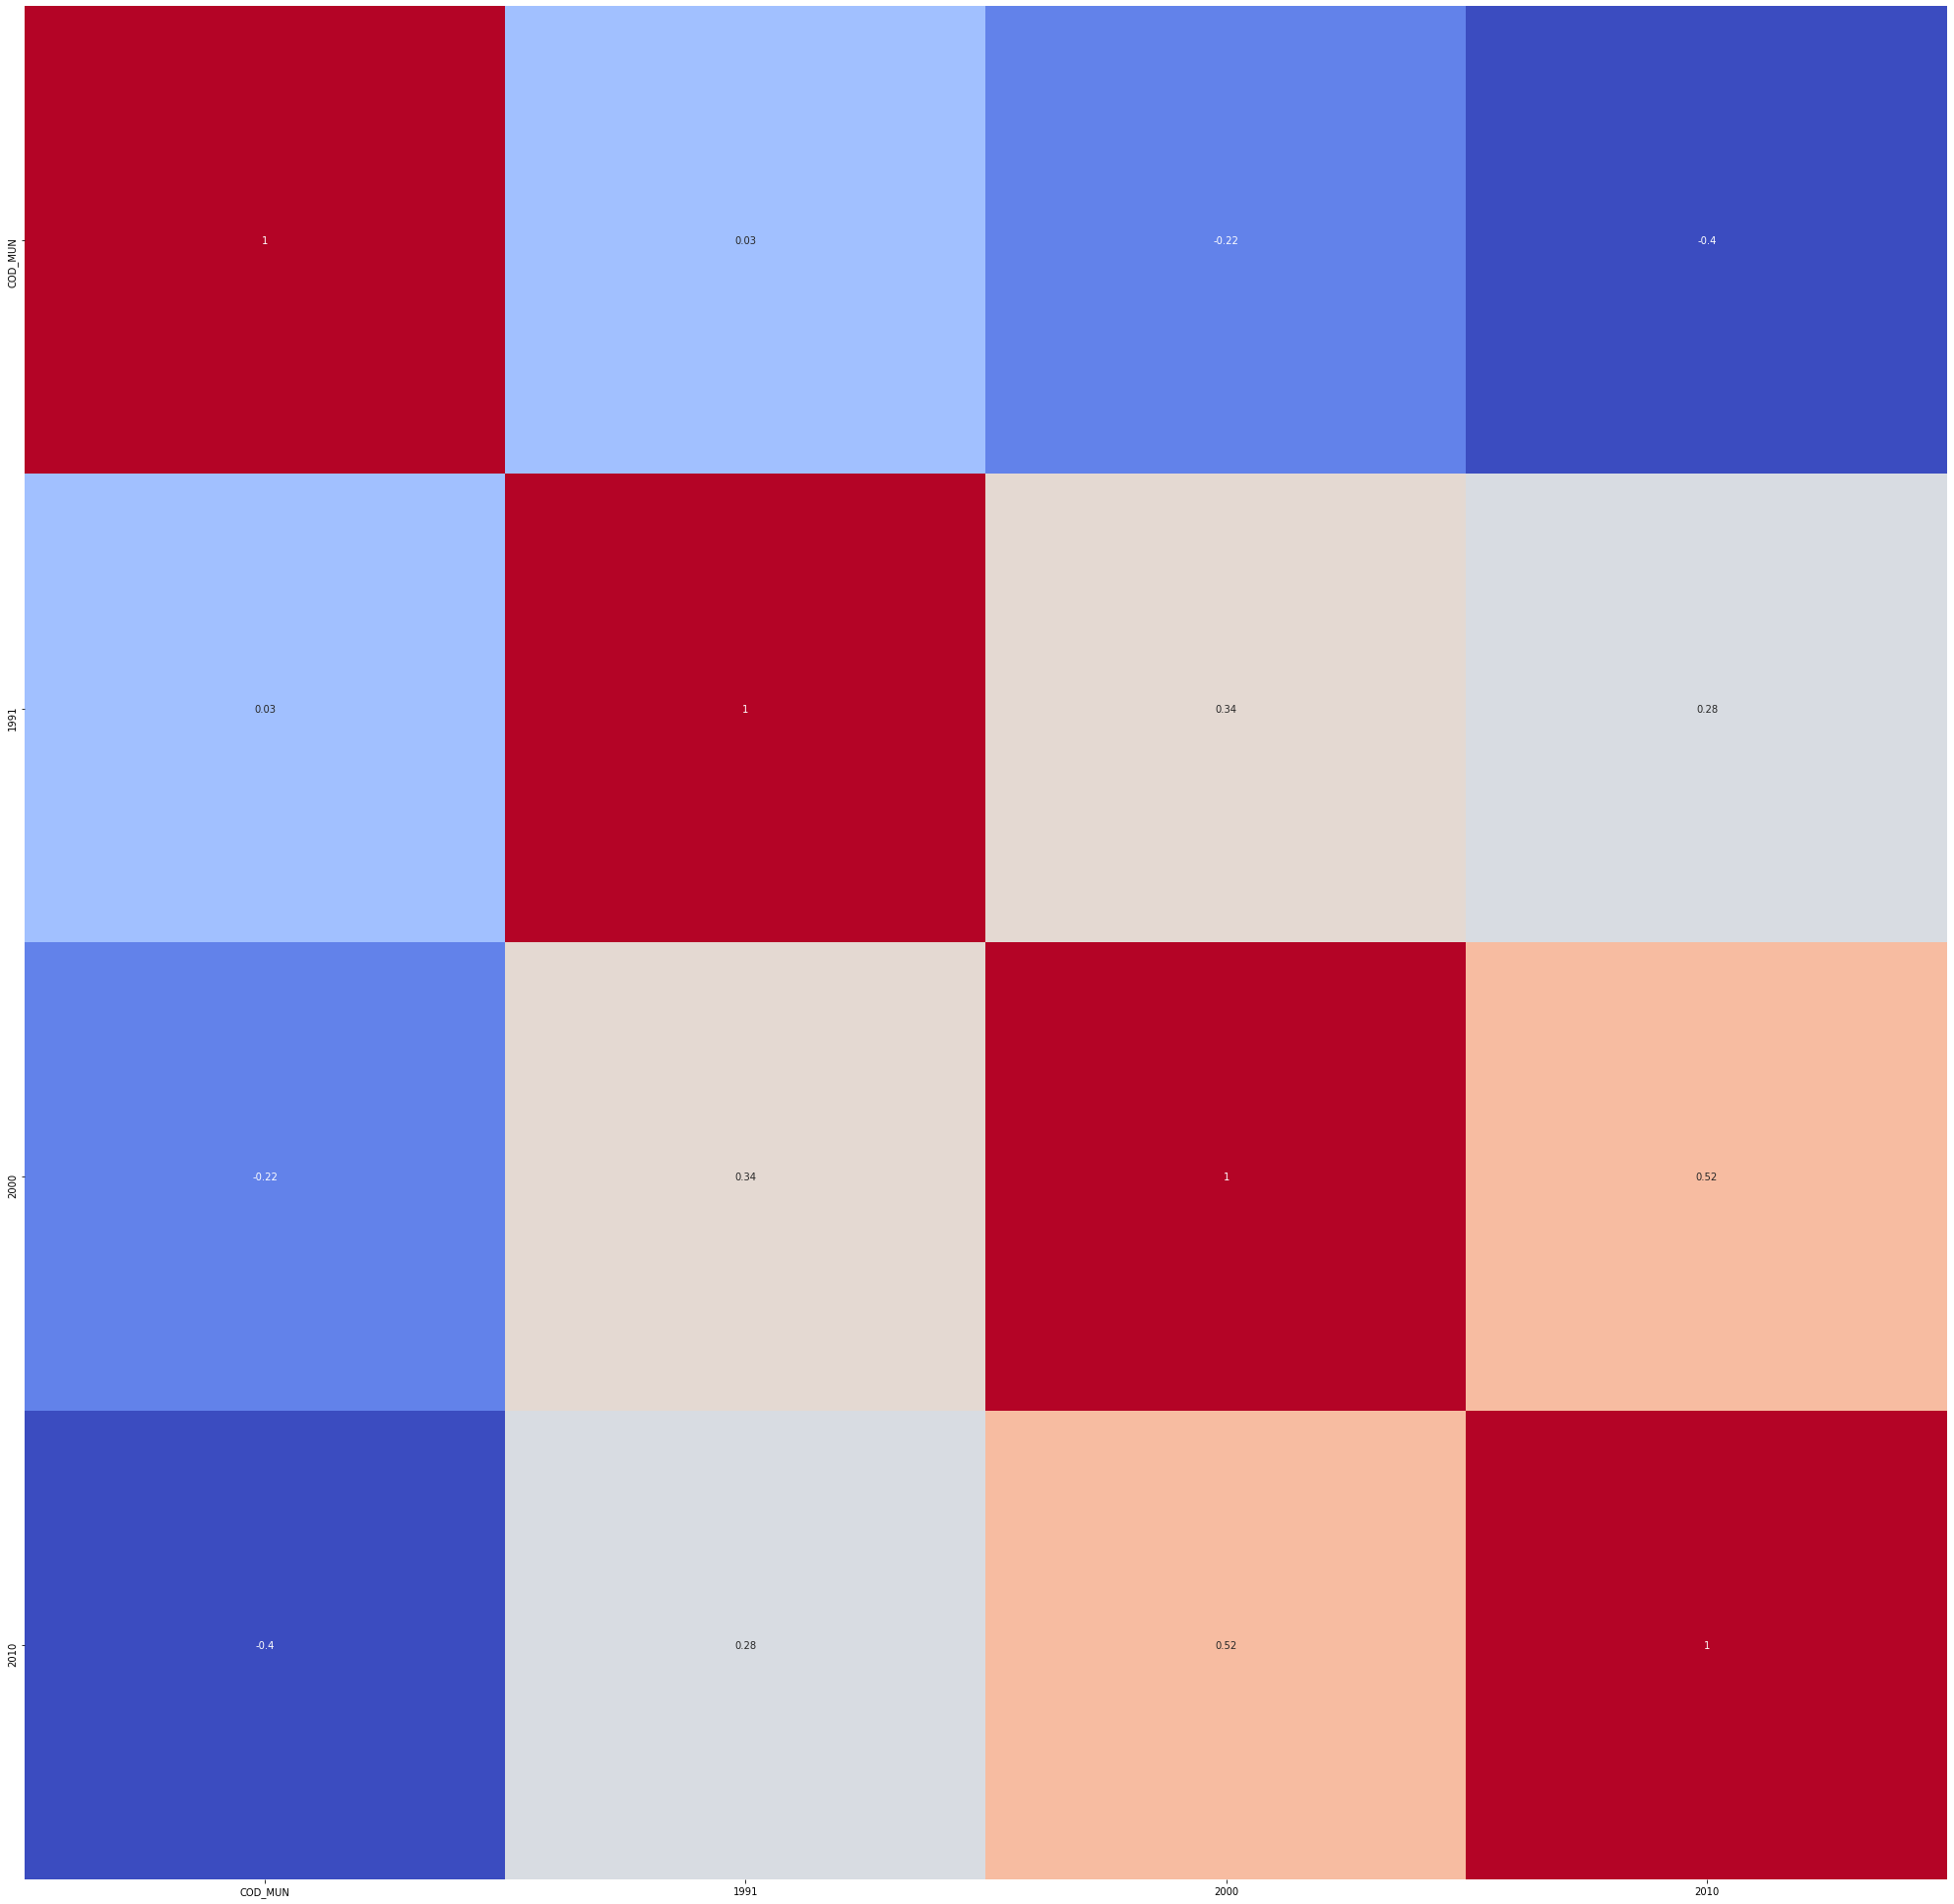

In [10]:
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df_gini = pd.read_csv(path_gini, sep=';', skiprows=2, skipfooter=2, engine='python', na_values='...', decimal=',')
df_gini['cod_ibge6'] = df_gini['Município'].str[:6]

df_ig = pd.merge(df_ideb, df_gini, on='cod_ibge6') 


fig, axc = plt.subplots(figsize=(35,35)) 
sns.heatmap(data=df_ig.corr(), annot=True, cmap='coolwarm', cbar=False, ax=axc)